[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/berserker1/M/blob/master/KNN.ipynb)

In [0]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=['sepal-length','sepal-width','petal-length','petal-width','Class']
dataset=pd.read_csv(url,names=names)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
param=dataset.iloc[:,0:4].values

In [0]:
labels=dataset.iloc[:,4:5].values

In [0]:
x_train,x_test,y_train,y_test=train_test_split(param,labels,test_size=0.2)

In [0]:
scalar=StandardScaler()

In [122]:
scalar.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
x_train=scalar.transform(x_train)

In [0]:
x_test=scalar.transform(x_test)

In [0]:
classifier=KNeighborsClassifier(n_neighbors=5)

In [126]:
classifier.fit(x_train,y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
y_pred=classifier.predict(x_test)

In [128]:
print(confusion_matrix(y_test,y_pred))

[[ 7  0  0]
 [ 0 12  1]
 [ 0  1  9]]


In [129]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.90      0.90      0.90        10

    avg / total       0.93      0.93      0.93        30



### **Plotting error for different values of K**

In [130]:
error=[]
for i in range(1,20):
  clr=KNeighborsClassifier(n_neighbors=i)
  clr.fit(x_train,y_train.ravel())
  out=clr.predict(x_test)
  error.append(np.mean(out!=y_test))
  print(error)

[0.6466666666666666]
[0.6466666666666666, 0.6433333333333333]
[0.6466666666666666, 0.6433333333333333, 0.6433333333333333]
[0.6466666666666666, 0.6433333333333333, 0.6433333333333333, 0.64]
[0.6466666666666666, 0.6433333333333333, 0.6433333333333333, 0.64, 0.6466666666666666]
[0.6466666666666666, 0.6433333333333333, 0.6433333333333333, 0.64, 0.6466666666666666, 0.6433333333333333]
[0.6466666666666666, 0.6433333333333333, 0.6433333333333333, 0.64, 0.6466666666666666, 0.6433333333333333, 0.6466666666666666]
[0.6466666666666666, 0.6433333333333333, 0.6433333333333333, 0.64, 0.6466666666666666, 0.6433333333333333, 0.6466666666666666, 0.64]
[0.6466666666666666, 0.6433333333333333, 0.6433333333333333, 0.64, 0.6466666666666666, 0.6433333333333333, 0.6466666666666666, 0.64, 0.6433333333333333]
[0.6466666666666666, 0.6433333333333333, 0.6433333333333333, 0.64, 0.6466666666666666, 0.6433333333333333, 0.6466666666666666, 0.64, 0.6433333333333333, 0.64]
[0.6466666666666666, 0.6433333333333333, 0.6

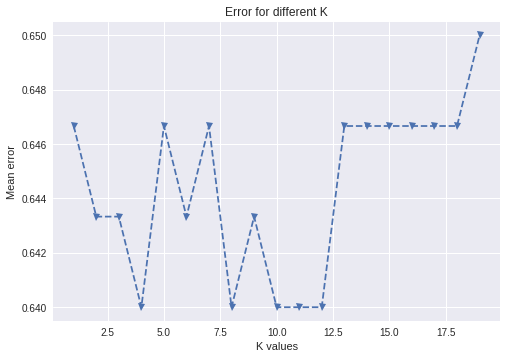

In [131]:
plt.title("Error for different K")
plt.xlabel("K values")
plt.ylabel("Mean error")
plt.plot(range(1,20),error,linestyle='dashed',marker='v')
plt.show()

In [132]:
print("the best k value in the range of 1 to 20 is {}".format(np.argmin(error)))

the best k value in the range of 1 to 20 is 3
